In [12]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook'])


In [13]:
import sympy as smp
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2

In [14]:
t, phi = smp.symbols('t, phi', real=True)
w, f = smp.symbols('w, f', real=True, positive=True)
R, L, C, Z, I, U, Um, Im = smp.symbols('R, L, C, Z, I, U, Um, Im', real=True)


In [15]:
u = Um*smp.sin(w*t+phi)
u


Um*sin(phi + t*w)

In [16]:
i = Im*smp.sin(w*t - phi)
i


-Im*sin(phi - t*w)

In [17]:
didt = smp.diff(i,t)


In [18]:
e = -L*didt
e

-Im*L*w*cos(phi - t*w)

In [19]:
Um = U*smp.sqrt(2)
Um
u = Um*smp.sin(w*t)
u

sqrt(2)*U*sin(t*w)

In [20]:
I = U/Z
I


U/Z

In [21]:
Z = smp.sqrt(R**2+ (L*w)**2)
Z

sqrt(L**2*w**2 + R**2)

In [22]:
I = U/Z
I

U/sqrt(L**2*w**2 + R**2)

In [23]:
Im = I*smp.sqrt(2)
Im

sqrt(2)*U/sqrt(L**2*w**2 + R**2)

In [24]:
u = Um*smp.sin(w*t+phi)
u

sqrt(2)*U*sin(phi + t*w)

In [25]:
i = Im*smp.sin(w*t - phi)
i

-sqrt(2)*U*sin(phi - t*w)/sqrt(L**2*w**2 + R**2)

In [26]:
e = -L*smp.diff(i,t)
e

-sqrt(2)*L*U*w*cos(phi - t*w)/sqrt(L**2*w**2 + R**2)

In [27]:
f_u = smp.lambdify([t,w,phi,U], u)
f_i = smp.lambdify([t,w,phi,L,R,U], i)
f_e = smp.lambdify([t,w,phi,L,R,U], e)

In [28]:
x = np.linspace(0, 0.02, 1000)
u

sqrt(2)*U*sin(phi + t*w)

In [29]:
# calcul numerique
U_ = 120
f = 50
w_ = 2*np.pi*f

In [30]:
r = f_u(t=x, phi=0, w=w_, U=U_)

In [31]:
l = f_u(t=x, phi=np.pi/2, w=w_, U=U_)


In [32]:
c = f_u(t=x, phi=-np.pi/2, w=w_, U=U_)

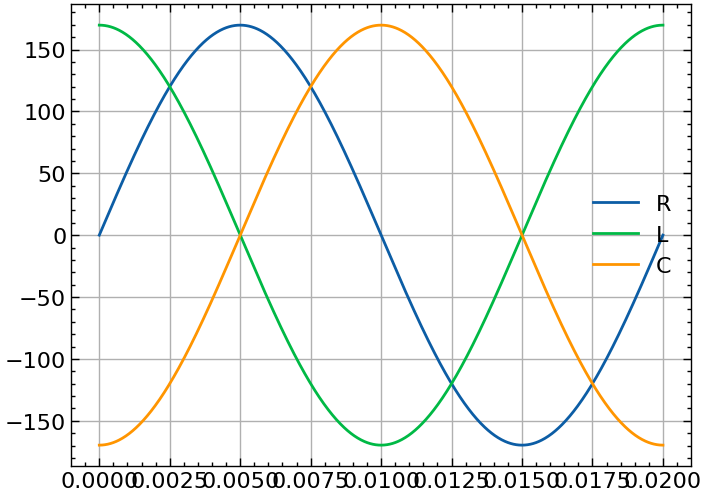

In [33]:
plt.plot(x,r,label='R')
plt.plot(x,l,label='L')
plt.plot(x,c,label='C')
plt.legend()
plt.grid()
plt.show()

In [34]:
f_u = smp.lambdify([t,w,phi,U], u)
f_i = smp.lambdify([t,w,phi,L,R,U], i)
f_e = smp.lambdify([t,w,phi,L,R,U], e)

In [35]:
# calcul numerique
R_ = 100
L_ = .318
U_ = 120
phi_ = np.arctan(L_*w_/R_)
phi_
u


sqrt(2)*U*sin(phi + t*w)

In [36]:
ur_ = f_u(t=x, w=w_, phi=-phi_, U=U_)
u_ = f_u(t=x, w=w_, phi=0, U=U_)
i_ = f_i(t=x, w=w_, phi=phi_, R=R_, L=L_, U=U_)
e_ = f_e(t=x, w=w_, phi=phi_, R=R_, L=L_, U=U_)


In [37]:
u


sqrt(2)*U*sin(phi + t*w)

In [38]:
i


-sqrt(2)*U*sin(phi - t*w)/sqrt(L**2*w**2 + R**2)

In [39]:
e

-sqrt(2)*L*U*w*cos(phi - t*w)/sqrt(L**2*w**2 + R**2)

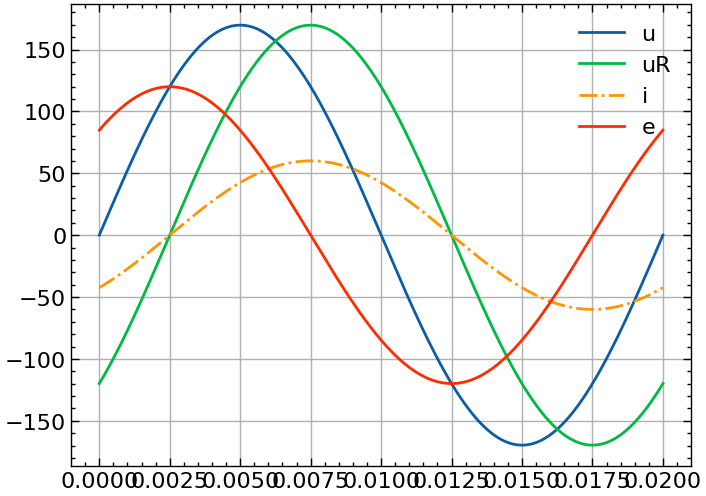

In [40]:
plt.plot(x,u_,label='u')
plt.plot(x,ur_,label='uR')
plt.plot(x,50*i_,'-.',label='i')
plt.plot(x,-e_,label='e')
plt.legend()
plt.grid()
plt.show()

In [41]:
Z


sqrt(L**2*w**2 + R**2)

In [42]:
f_Z = smp.lambdify([w,L,R,U], Z)


In [43]:
f_Z(w=w_,L=L_,R=R_,U=U_)

141.352533597943

In [44]:
I


U/sqrt(L**2*w**2 + R**2)

In [45]:
f_I = smp.lambdify([w,L,R,U], I)

In [46]:
f_I(w=w_,L=L_,R=R_,U=U_)

0.8489412743129372